## BREAST CANCER DETECTION USING RANDOM FORSEST 

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\akhila rathod\Downloads\breast-cancer.csv')

###### Clearly viewing all the details of rows and columns described in the above dataset used.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head() 
# Displays first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.diagnosis.unique()
#identifying and analysing the types of cancers detected snd recorded in the dataset.

array(['M', 'B'], dtype=object)

In [6]:
#dropping unwanted columns like id from the dataset
data.drop('id',axis=1,inplace=True)

###### Binarizing the Target variables

In [8]:
#converting the target variable "diagnosis" to 1's and 0's to make further calculations.
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

Due to the large degree of variability in the data, features with minimal variance will be disregarded. To enable greater predictive power, we will scale the data.
Data Preprocessing allows to neglect the variables with low variance.
Standardizing the dataset - meaning shifting the distribution to have mean of zero and standard deviation of unit variance

In [10]:
import datetime as dt
from sklearn import preprocessing

In [11]:
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))

In [12]:
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

###### Explainatory Data Analysis

Visually representing no. of patients diagnosed with Malignant and Benign Tumors.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

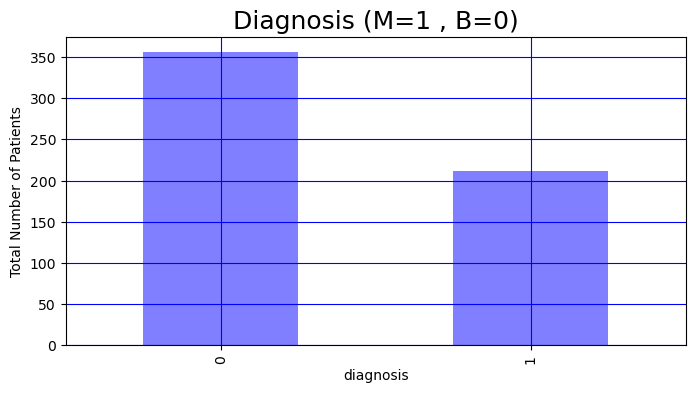

In [20]:
#labeling and adding grid to the generated analysis
datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(8,4))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")
plt.grid(color='b')

###### Feature scaling
Neglecting all the columns which do not contribute in the maximum to build the project

In [25]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [26]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
data_main = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

###### Using Heatmap to show the correlation between the features and the target variable "diagnosis"


In [29]:
import seaborn as sns

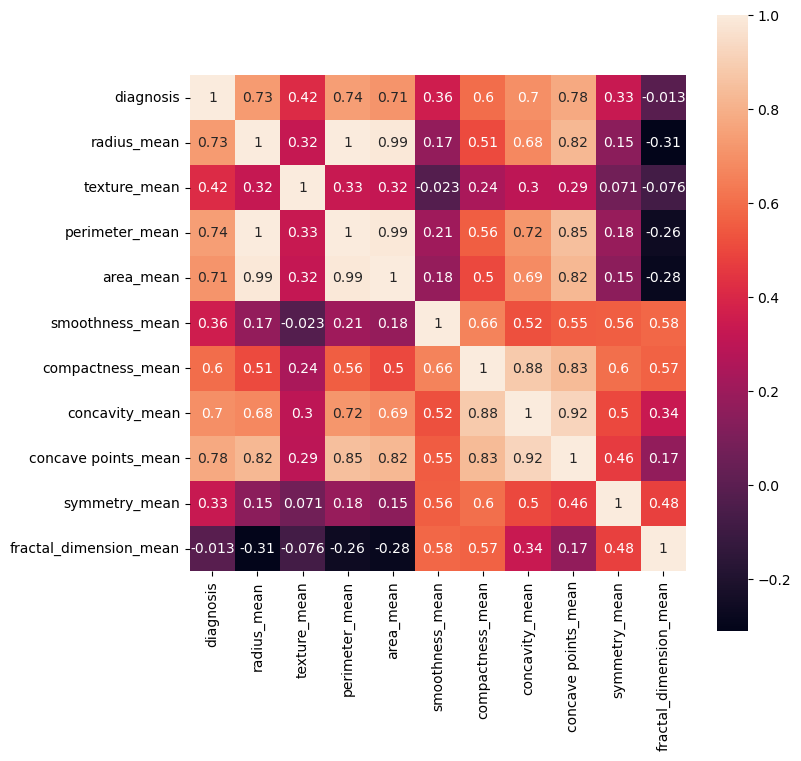

In [34]:
plt.figure(figsize=(8,8))
foo = sns.heatmap(data_main.corr(), vmax=1, square=True, annot=True)

From the above graph it is shown that "radius_mean , perimeter_mean,area_mean , compactness_mean , concavity_mean, concave points_mean" has high correlation with the diagnosis.

###### Seggregating into Test and Train data sets

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

In [38]:
features = data_main.columns[2:11]
target_feature = "diagnosis"

X = data_main.loc[:,features]
y = np.ravel(data.loc[:,[target_feature]])

# Splitting the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape[0],X_test.shape[0]) 

455 114


###### Mean accuracy using Random Forest Classifier Model

In [39]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
random_forest = RandomForestClassifier()
#taking cross validation as 10 as it would give better accuracy due to less data points
scores = cross_val_score(random_forest, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print(round(scores*100,2))

94.3


###### Mean accuracy using Logestic Regression Model

In [43]:
# Importing the model:
from sklearn.linear_model import LogisticRegression

# Initiating the model:
logestic_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

scores = cross_val_score(logestic_reg, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print(round(scores*100,2))

90.78


###### Mean accuracy using SVM

In [44]:
# Importing the model:
from sklearn import svm

# Initiating the model:
svm = svm.SVC()

scores = cross_val_score(svm, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print(round(scores*100,2))

86.83


###### Mean accuracy using SVM

In [45]:
# Importing the model:
from sklearn.neighbors import KNeighborsClassifier

# Initiating the model:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print(round(scores*100,2))

88.37


###### Mean accuracy using Naive Bayes

In [46]:
# Importing the model:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
naive_bayes = GaussianNB()

scores = cross_val_score(naive_bayes, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print(round(scores*100,2))

92.32


Defaulting no. of trees to 10 and finding the best estimator to get better scores and setteling on a model

In [48]:
for i in range(1, 31):
    random_forest = RandomForestClassifier(n_estimators = i)
    score = cross_val_score(random_forest, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.91
N = 2 :: Score = 0.92
N = 3 :: Score = 0.93
N = 4 :: Score = 0.93
N = 5 :: Score = 0.93
N = 6 :: Score = 0.93
N = 7 :: Score = 0.93
N = 8 :: Score = 0.93
N = 9 :: Score = 0.92
N = 10 :: Score = 0.94
N = 11 :: Score = 0.95
N = 12 :: Score = 0.93
N = 13 :: Score = 0.94
N = 14 :: Score = 0.93
N = 15 :: Score = 0.94
N = 16 :: Score = 0.94
N = 17 :: Score = 0.93
N = 18 :: Score = 0.94
N = 19 :: Score = 0.93
N = 20 :: Score = 0.94
N = 21 :: Score = 0.93
N = 22 :: Score = 0.95
N = 23 :: Score = 0.93
N = 24 :: Score = 0.94
N = 25 :: Score = 0.93
N = 26 :: Score = 0.94
N = 27 :: Score = 0.93
N = 28 :: Score = 0.94
N = 29 :: Score = 0.93
N = 30 :: Score = 0.94


Trees with 21 can give a reasonable estimate

###### Testing the dataset at the above estimate value

Test using both Random forest model and Naive Bayes as they have better mean accuracy.

Testing using Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
random_forest = RandomForestClassifier(n_estimators=21)

random_forest = random_forest.fit(X_train, y_train)

result = random_forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, result)

print ((accuracy))

0.9385964912280702


Testing using Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
naive_bayes = GaussianNB()

naive_bayes = naive_bayes.fit(X_train, y_train)

result = naive_bayes.predict(X_test)

accuracy = metrics.accuracy_score(y_test, result)

print ((accuracy))

0.8947368421052632


###### Conclusion: Hence Random Forest cLassifier is the better Model for Breast Cancer Detection

In [58]:
predictions = random_forest.predict(X_test)
predictions[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[:10]

['B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']

###### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

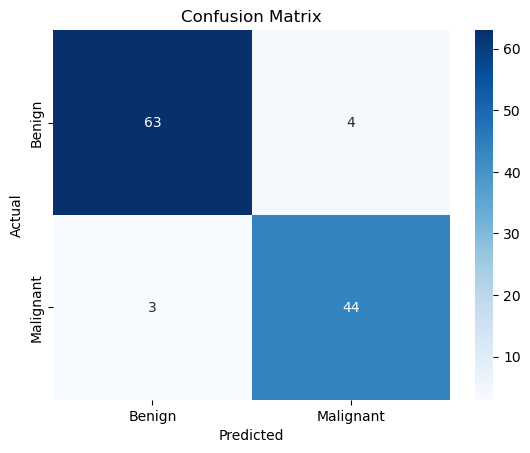

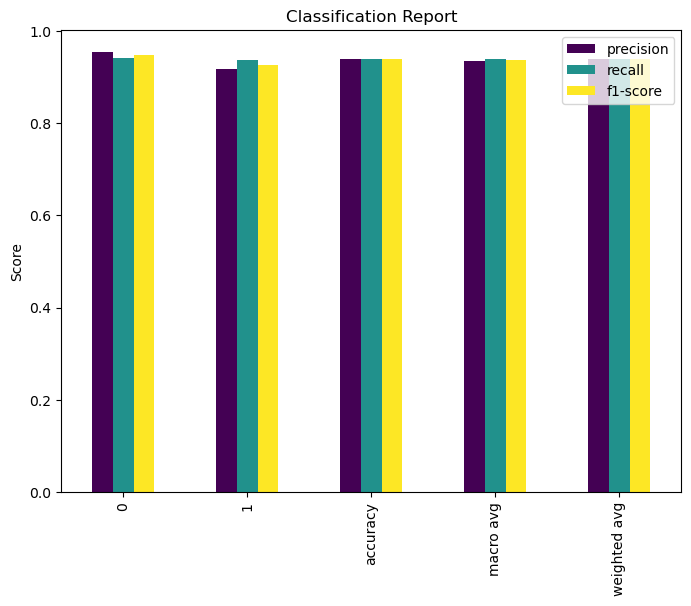

In [64]:
cfm = confusion_matrix(y_test, predictions)
labels = ['Benign', 'Malignant']
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting a bar chart for the classification report
report_dict = classification_report(y_test, predictions, digits=3, output_dict=True)
report_df = pd.DataFrame(report_dict).T
report_df = report_df.drop(['support'], axis=1)
report_df.plot(kind='bar', colormap='viridis', figsize=(8, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.show()